**Names: Philipp Köhler, Alexander Bespalov**


# Sheet 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

## 1 Bayes: Signal or Noise?
To find the posterior probability we can use Bayes' theorem:

$$
p(\text { gamma ray } \mid \text { target direction })=\frac{p(\text { target direction } \mid \text { gamma ray }) p(\text { gamma ray })}{p(\text { target direction })}
$$

whereas:
$$
p(\text { target direction })=p(\text { target direction } \mid \text { gamma ray }) p(\text { gamma ray })+p(\text { target direction } \mid \text { background }) p(\text { background })
$$

Plugging in all the numbers from the exercise yields:
$$
p(\text { gamma ray } \mid \text { target direction }) =\frac{0.95 \cdot 0.1}{0.1 \cdot 0.9 + 0.95 \cdot 0.1} = \frac{19}{37} \approx 0.5135
$$

## 2 Bayes Classifier
The Bayes classifier is given by:
$$
\argmin_f R(f)
$$
$R(f)$ is the bayes risk.
$$
R(f) = \mathbb{E}_X\mathbb{E}_{Y \mid X}L(Y=y,f(X=x))
$$
The minimization can be done pointwise for each x. Therefore the function of interest is:
$$
\sum_{y\in Y}L(y,f(x))p(y \mid x)
$$
### a)
For $\hat y=0$ the expected loss is:
$$
\mathbb{E}_{Y \mid X=x}L(y, 0)= 0 \cdot p(0\mid x) + 10 \cdot p(1 \mid x) = 10 \cdot p(1 \mid x)
$$
For $\hat y=1$ the expected loss is:
$$
\mathbb{E}_{Y \mid X=x}L(y, 1)= 0 \cdot p(1\mid x) + 1 \cdot p(0 \mid x) = 1 \cdot p(0 \mid x) = 1 - p(1 \mid x)
$$
To minimize the Loss, we want:
$$
10 \cdot p(y = 1 \mid x) < 1 - p(y = 1 \mid x).
$$

Rearrange this inequality:
$$
10 \cdot p(y = 1 \mid x) + p(y = 1 \mid x) < 1,
$$
$$
11 \cdot p(y = 1 \mid x) < 1,
$$
$$
p(y = 1 \mid x) < \frac{1}{11}.
$$

Therefore, the optimal Bayes classifier is:
$$
\hat{y} = 
\begin{cases} 
0 & \text{if } p(y = 1 \mid x) < \frac{1}{11}, \\
1 & \text{if } p(y = 1 \mid x) \geq \frac{1}{11}.
\end{cases}
$$
This classifier is more conservative about predicting $y=0$. This is useful when a misclassification of a true $y=1$ has disadvantages, as in the detection of illnesses.

## b)

For $\hat y=0$ the expected loss is:
$$
\mathbb{E}_{Y \mid X=x}L(y, 0)= \sum_{i=1}^{k}  \alpha \cdot p(y=i\mid x) = \alpha
$$
For $\hat y = j, j \in \{1,2,...,k\}$ the expected loss is:
$$
\mathbb{E}_{Y \mid X=x}L(y, \hat y)= \sum_{i \in \{1,2,...,k\}\backslash j} 1 \cdot p(y=i \mid x) = 1-p(\hat y = j\mid x)
$$
The decision follows as:
$$
\hat{y} = 
\begin{cases} 
j & \text{if } 1 - p(y = j \mid x) < \alpha \text{ and } p(y = j \mid x) = \max\limits_{i \in \{1, \ldots, k\}} p(y = i \mid x), \\
0 & \text{if } 1 - \max\limits_{i \in \{1, \ldots, k\}} p(y = i \mid x) \geq \alpha.
\end{cases}
$$

$\alpha$ introduces a minimum certainty level for classes, else they are rejected. If the certainty is achieved the $y$ with the maximum probability is chosen. This is again important if misclassification causes trouble and a certainty level is needed.

## 3 QDA
### (a) + (b)

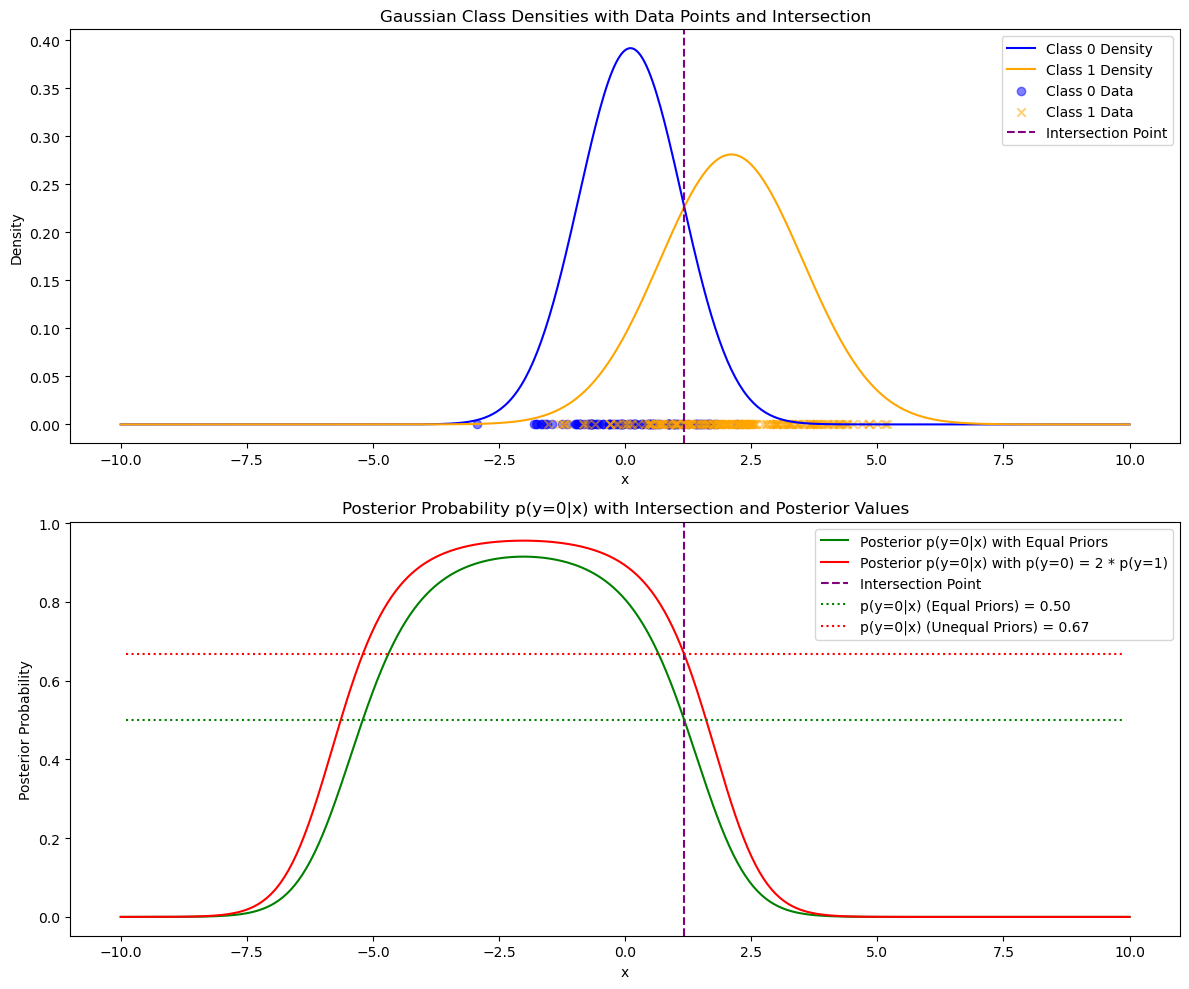

In [2]:
# Load data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# Fit Gaussian distribution
class_0_pts = pts[labels == 0]
class_1_pts = pts[labels == 1]

mean_0, std_0 = np.mean(class_0_pts), np.std(class_0_pts)
mean_1, std_1 = np.mean(class_1_pts), np.std(class_1_pts)


x_range = np.linspace(-10, 10, 500)

# Compute Gaussian class densities
pdf_class_0 = norm.pdf(x_range, mean_0, std_0)
pdf_class_1 = norm.pdf(x_range, mean_1, std_1)

#find density intersections
def find_intersection():
    return fsolve(lambda x: norm.pdf(x, mean_0, std_0) - norm.pdf(x, mean_1, std_1), 1.0)[0]  # initial guess near expected value


x_intersect = find_intersection()
y_intersect_density = norm.pdf(x_intersect, mean_0, std_0)

# Assuming equal prior
prior_0_equal = 0.5
prior_1_equal = 0.5

# Compute posterior probabilities
posterior_y0_equal = (pdf_class_0 * prior_0_equal) / (pdf_class_0 * prior_0_equal + pdf_class_1 * prior_1_equal)

# Assuming unequal priors
prior_0_unequal = 2 / 3
prior_1_unequal = 1 / 3

# Compute posterior probabilities
posterior_y0_unequal = (pdf_class_0 * prior_0_unequal) / (pdf_class_0 * prior_0_unequal + pdf_class_1 * prior_1_unequal)

# Compute the posterior probabilities at the intersection point
y_intersect_posterior_equal = (norm.pdf(x_intersect, mean_0, std_0) * prior_0_equal) / \
                              (norm.pdf(x_intersect, mean_0, std_0) * prior_0_equal + norm.pdf(x_intersect, mean_1, std_1) * prior_1_equal)
y_intersect_posterior_unequal = (norm.pdf(x_intersect, mean_0, std_0) * prior_0_unequal) / \
                                (norm.pdf(x_intersect, mean_0, std_0) * prior_0_unequal + norm.pdf(x_intersect, mean_1, std_1) * prior_1_unequal)


plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(x_range, pdf_class_0, label="Class 0 Density", color="blue")
plt.plot(x_range, pdf_class_1, label="Class 1 Density", color="orange")
plt.scatter(class_0_pts, np.zeros_like(class_0_pts), label="Class 0 Data", color="blue", alpha=0.5, marker='o')
plt.scatter(class_1_pts, np.zeros_like(class_1_pts), label="Class 1 Data", color="orange", alpha=0.5, marker='x')
plt.axvline(x=x_intersect, color="purple", linestyle="--", label="Intersection Point")
plt.title("Gaussian Class Densities with Data Points and Intersection")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x_range, posterior_y0_equal, label="Posterior p(y=0|x) with Equal Priors", color="green")
plt.plot(x_range, posterior_y0_unequal, label="Posterior p(y=0|x) with p(y=0) = 2 * p(y=1)", color="red")
plt.axvline(x=x_intersect, color="purple", linestyle="--", label="Intersection Point")
plt.axhline(y=y_intersect_posterior_equal, color="green", linestyle=":", 
            label=f"p(y=0|x) (Equal Priors) = {y_intersect_posterior_equal:.2f}", xmin=0.05, xmax=0.95)
plt.axhline(y=y_intersect_posterior_unequal, color="red", linestyle=":", 
            label=f"p(y=0|x) (Unequal Priors) = {y_intersect_posterior_unequal:.2f}", xmin=0.05, xmax=0.95)
plt.title("Posterior Probability p(y=0|x) with Intersection and Posterior Values")
plt.xlabel("x")
plt.ylabel("Posterior Probability")
plt.legend()

plt.tight_layout()
plt.show()



We can see, that for a point at the intersection of the two class densities, meaning where they have equal value, the point is assigned a posterior probability of 0.5 to be in class 0, which makes sense as the probability for it to be in one class or the other should be equal as the priors are equal. If we now make the priors not equal in favor of class 0 the posterior also becomes larger for the point to be in class 0, as it can be seen in the graph. Mathmatically:
Given two classes $y=0$ and $y=1$, the posterior probability for $y=0$ is computed as follows:

$$
p(y=0 \mid x)=\frac{p(x \mid y=0) \cdot p(y=0)}{p(x \mid y=0) \cdot p(y=0)+p(x \mid y=1) \cdot p(y=1)}
$$


Similarly, the posterior probability for $y=1$ is:

$$
p(y=1 \mid x)=\frac{p(x \mid y=1) \cdot p(y=1)}{p(x \mid y=0) \cdot p(y=0)+p(x \mid y=1) \cdot p(y=1)}
$$


Since $p(y=0 \mid x)+p(y=1 \mid x)=1$, these probabilities are complementary. At the intersection point $x=x_{\text {intersect }}$, we have:

$$
p(x \mid y=0)=p(x \mid y=1)
$$


We denote this common density value at the intersection point as $D$, so:

$$
p\left(x_{\text {intersect }} \mid y=0\right)=p\left(x_{\text {intersect }} \mid y=1\right)=D
$$
When the priors are equal, i.e., $p(y=0)=p(y=1)=0.5$, the posterior probability for $y=0$ at the intersection point becomes:

$$
p\left(y=0 \mid x_{\text {intersect }}\right)=\frac{D \cdot 0.5}{D \cdot 0.5+D \cdot 0.5}=\frac{0.5}{0.5+0.5}=\frac{0.5}{1}=0.5
$$


Similarly,

$$
p\left(y=1 \mid x_{\text {intersect }}\right)=0.5
$$
Making the priors unequal, favoring class 0 . Suppose $p(y=0)=\frac{2}{3}$ and $p(y=1)=\frac{1}{3}$. Then, at $x_{\text {intersect, }}$, the posterior probability for $y=0$ becomes:

$$
p\left(y=0 \mid x_{\text {intersect }}\right)=\frac{D \cdot \frac{2}{3}}{D \cdot \frac{2}{3}+D \cdot \frac{1}{3}}=\frac{\frac{2}{3}}{\frac{2}{3}+\frac{1}{3}}=\frac{\frac{2}{3}}{1}=\frac{2}{3}
$$


Similarly, for class 1:

$$
p\left(y=1 \mid x_{\text {intersect }}\right)=\frac{D \cdot \frac{1}{3}}{D \cdot \frac{2}{3}+D \cdot \frac{1}{3}}=\frac{\frac{1}{3}}{1}=\frac{1}{3}
$$


## 4 Trees and Random Forests

### (b)

In [6]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# TODO: Sort the points to easily split them

# TODO: Implement or find implementation for Gini impurity, entropy and misclassifcation rate

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

# TODO: Iterate over the possible splits, evaulating and saving the three criteria for each one
# TODO: Then, Compute the split that each criterion favours and visualize them 
#       (e.g. with a histogram for each class and vertical lines to show the splits)

### (b)

In [7]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# TODO: define train, val and test splits as specified (make sure to shuffle the data before splitting it!)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# TODO: train a random forest classifier for each combination of specified hyperparameters 
#       and evaluate the performances on the validation set.

In [9]:
# TODO: for your preferred configuration, evaluate the performance of the best configuration on the test set